In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import peak_widths, find_peaks
from scipy.stats import t 
import warnings
import os
import sys
import math

In [2]:
def stat_error(data, conf_prob):
    #conf_prob - Доверительная вероятность  
    n = len(data)
    student_coef = round(t.ppf((1 + conf_prob )/2, n - 1), 2)
    var = np.var(data)
    interval = student_coef * math.sqrt((var)/n)
    return interval
    

# Задание 1
Разными способами  измерить  порог генерации для диодного лазера. 

Сначала  определяли визуально, когда интенсивность лазера резко увеличивалась

In [3]:
#Значения в mA 
I_1 = np.array([47.9, 47.5, 48, 47.3, 47.4])
I_1_avg = np.mean(I_1)
Delta_I_1_avg = stat_error(I_1, conf_prob=0.66)

Затем с помощью осциллографа и фотоприёмника

In [4]:
#Значения в mA 
I_2 = np.array([47.1, 47.3, 46.9, 47.0, 47.5])
I_2_avg = np.mean(I_2)
Delta_I_2_avg = stat_error(I_2, conf_prob=0.66)

Затем с помощью синхронника, работавшего на частоте $\nu = 10 кГц$ с амплитудой $A = 1 В$

In [5]:
#Значения в mA 
I_3 = np.array([47.0, 46.9, 46.8, 46.9, 46.8])
I_3_avg = np.mean(I_3)
Delta_I_3_avg = stat_error(I_3, conf_prob=0.66)

Затем, с помощью синхронника, но уже анализом второй производной. 

In [6]:
#Значения в mA 
I_4_avg = 46.9
#В качестве погрешности можно взять приборную - последнюю цифру прибора 
Delta_I_4_avg = 0.1

In [7]:
# построим диаграмму средних 

In [8]:
index = np.arange(1,5)
values = np.array([I_1_avg, I_2_avg, I_3_avg, I_4_avg])
errors = np.array([Delta_I_1_avg, Delta_I_2_avg, Delta_I_3_avg, Delta_I_4_avg])
colors  = ['r','g','orange','b'] 
labls = [
            '1 - без использования приборов', '2 - c использованием осциллографа и фотоприёмника',
            '3 - c использованием синхронного усилителя', '4 - c использованием синхронного усилителя в другом режиме'
        ] 

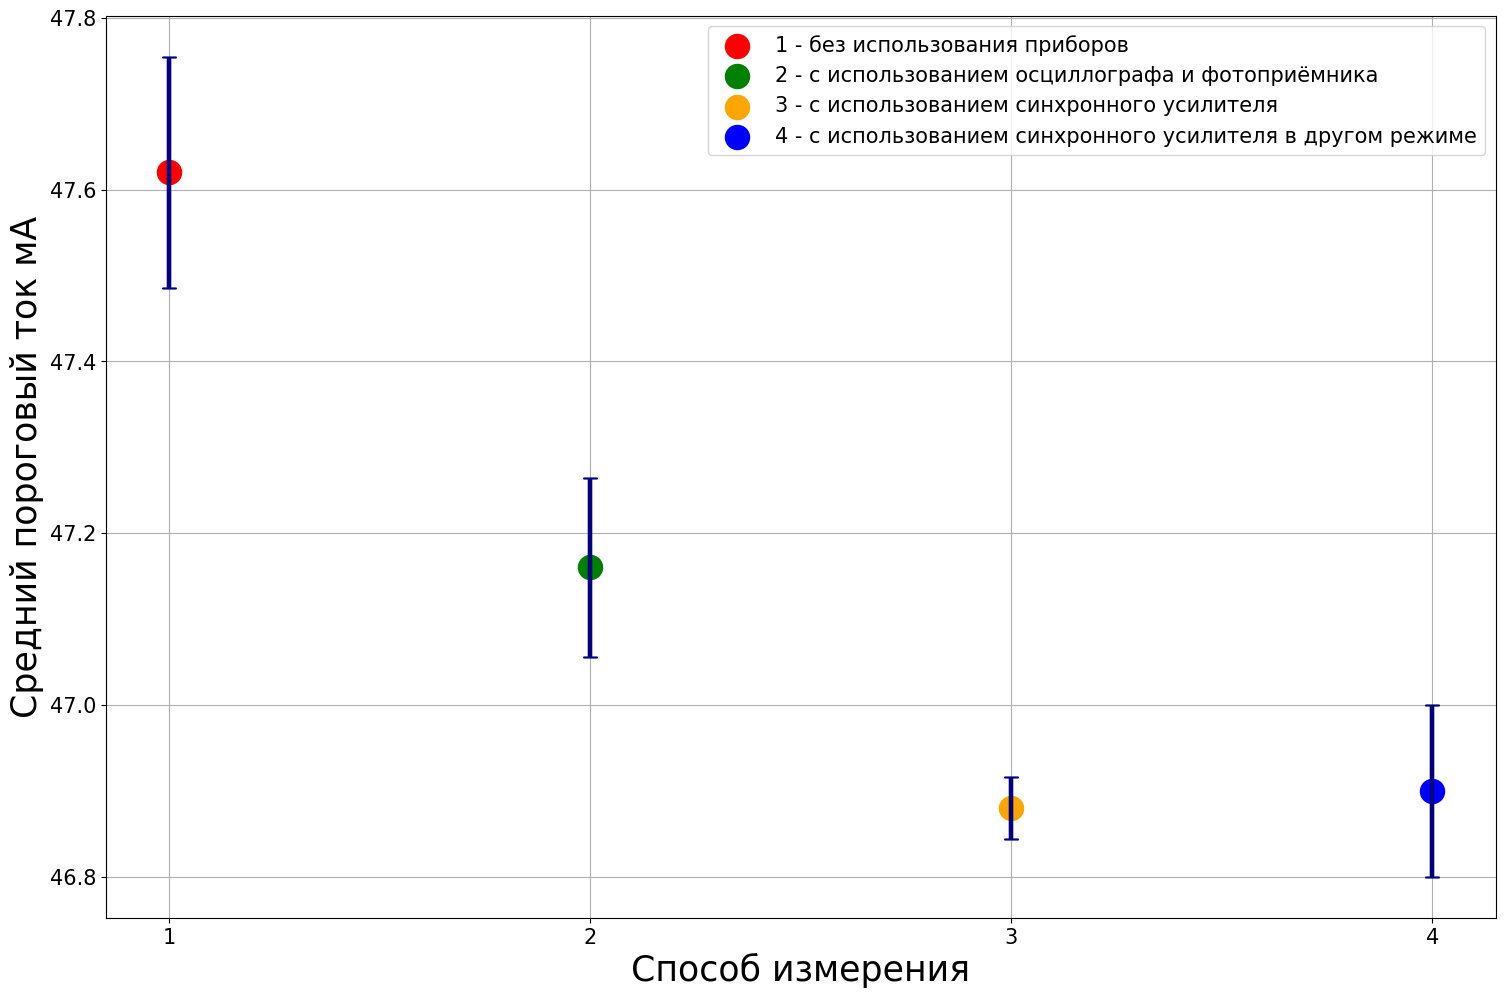

In [9]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('Средний пороговый ток мА',fontweight='light',color='k', fontsize=25)
ax.set_xlabel("Способ измерения",fontweight='light',color='k', fontsize=25)

for i in range(len(index)):
    ax.scatter(index[i], values[i],color = colors[i], s=300, label = labls[i])
    ax.errorbar(
            index, values, color= colors[i],  yerr=errors, ecolor = "navy", 
            fmt='-o',barsabove=True,
            ms=0, capsize = 5,
            linewidth=0,
            elinewidth = 3) 
ax.legend(fontsize=15)
plt.xticks(index,['1','2','3','4'])
#  Определяем внешний вид линий основной сетки:
ax.grid()
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)

fig.savefig(os.path.join(sys.path[0]+'/plots', 'mean_thr.png'))

In [10]:
sync_1 = np.loadtxt(os.path.join(sys.path[0]+'/data/sync_1.txt'),delimiter=",")
sync_2 = np.loadtxt(os.path.join(sys.path[0]+'/data/sync_2.txt'),delimiter=",")

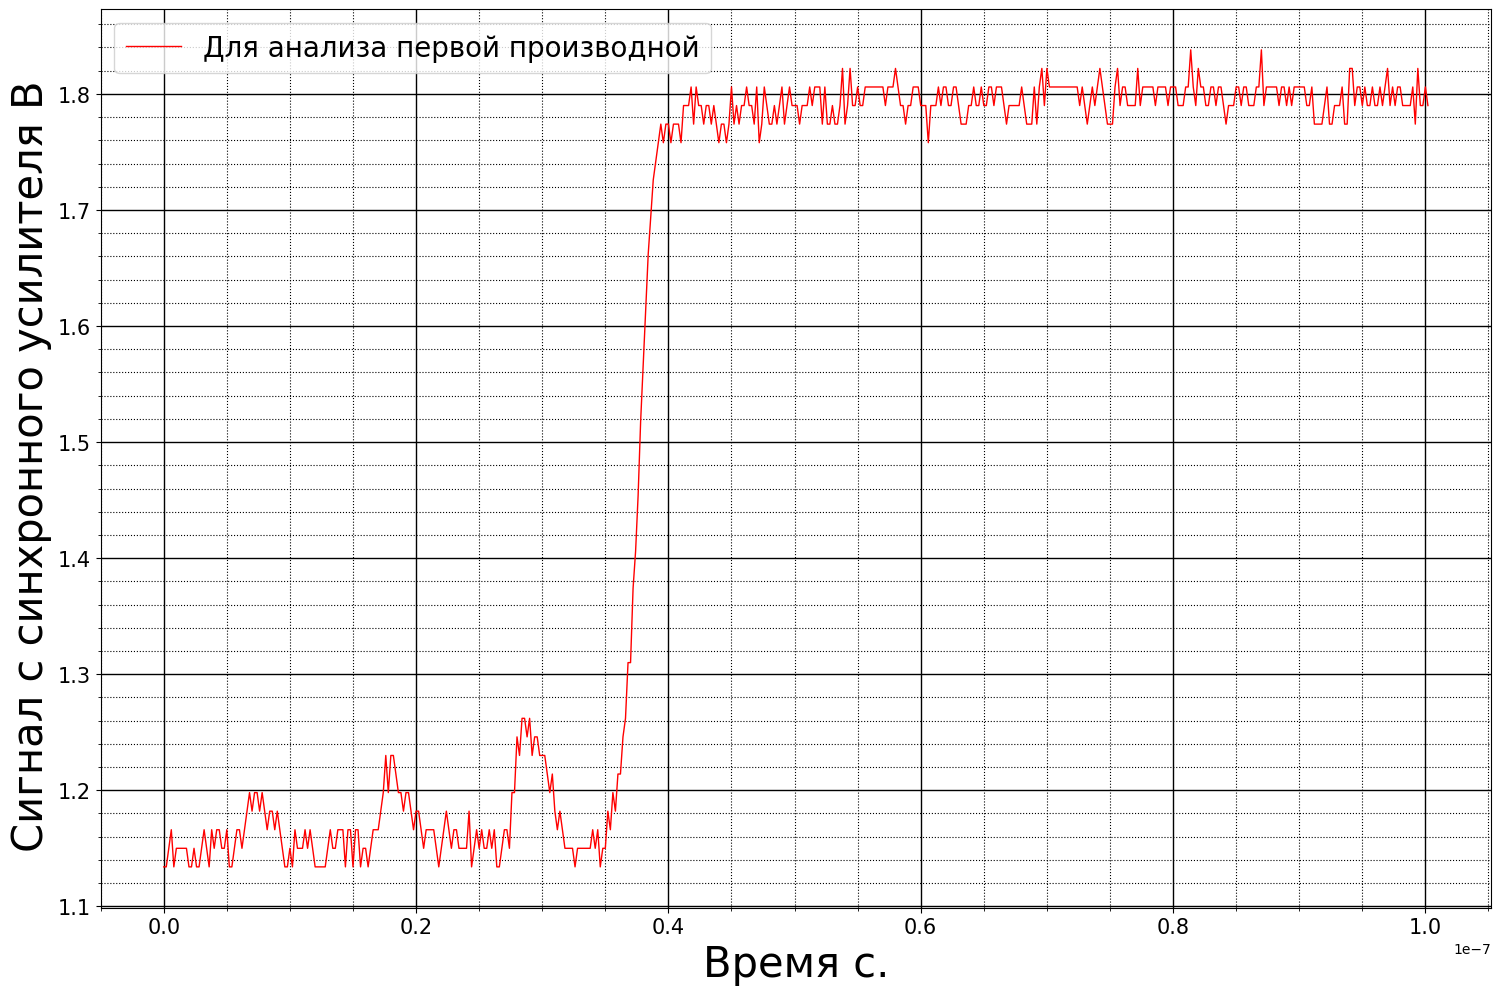

In [11]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 1
ax.plot(sync_1[:,0]-np.min(sync_1[:,0]),  sync_1[:,1], c = 'r',linewidth=width, label ='Для анализа первой производной')
ax.set_xlabel('Время с.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Сигнал с синхронного усилителя В ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()
ax.legend(fontsize=20, loc='upper left')
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

fig.savefig(os.path.join(sys.path[0]+'/plots', 'sync_1.png'))


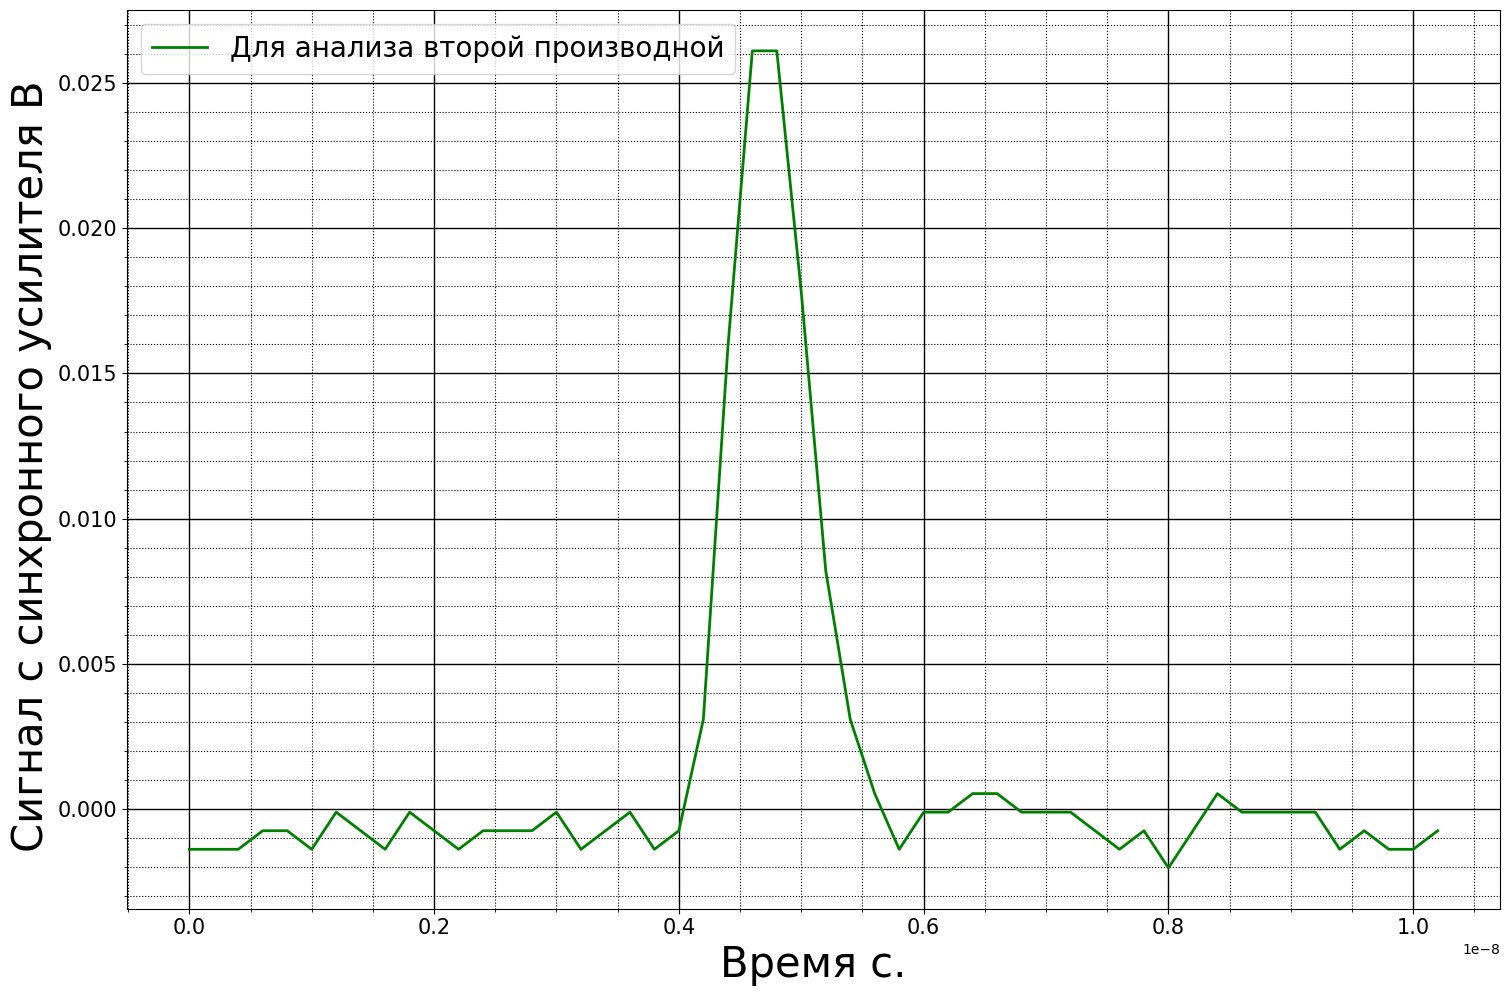

In [12]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(sync_2[:,0]-np.min(sync_2[:,0]),  sync_2[:,1], c = 'g',linewidth=width, label ='Для анализа второй производной')
ax.set_xlabel('Время с.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Сигнал с синхронного усилителя В ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()
ax.legend(fontsize=20, loc='upper left')
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

fig.savefig(os.path.join(sys.path[0]+'/plots', 'sync_2.png'))


# Задание 2
Во втором задании  с помощью сканирующего интерферометра необходимо было измерить либо ширину моды лазера, либо ширину линии усиления, зная область свободной дисперсии сканирующего интерферометра.

In [13]:
interf = np.loadtxt(os.path.join(sys.path[0]+'/data/interf.txt'),delimiter=",")
#Из информации о сканирующем интерферометре 
#FSR = область свободной дисперсии 
FSR = 250*1e+6 
#F - резкость
F = 180

In [14]:
#Необходимо подобрать такие n1 и n2, чтобы на графике остались только два пика 
print(len(interf))
n1 =500000
n2 = 1000000
sh_interf = interf[n1:n2] 
#Время будет в мс
sh_interf[:,0] = (sh_interf[:,0] - np.min(sh_interf[:,0]))*1e+3

1000001


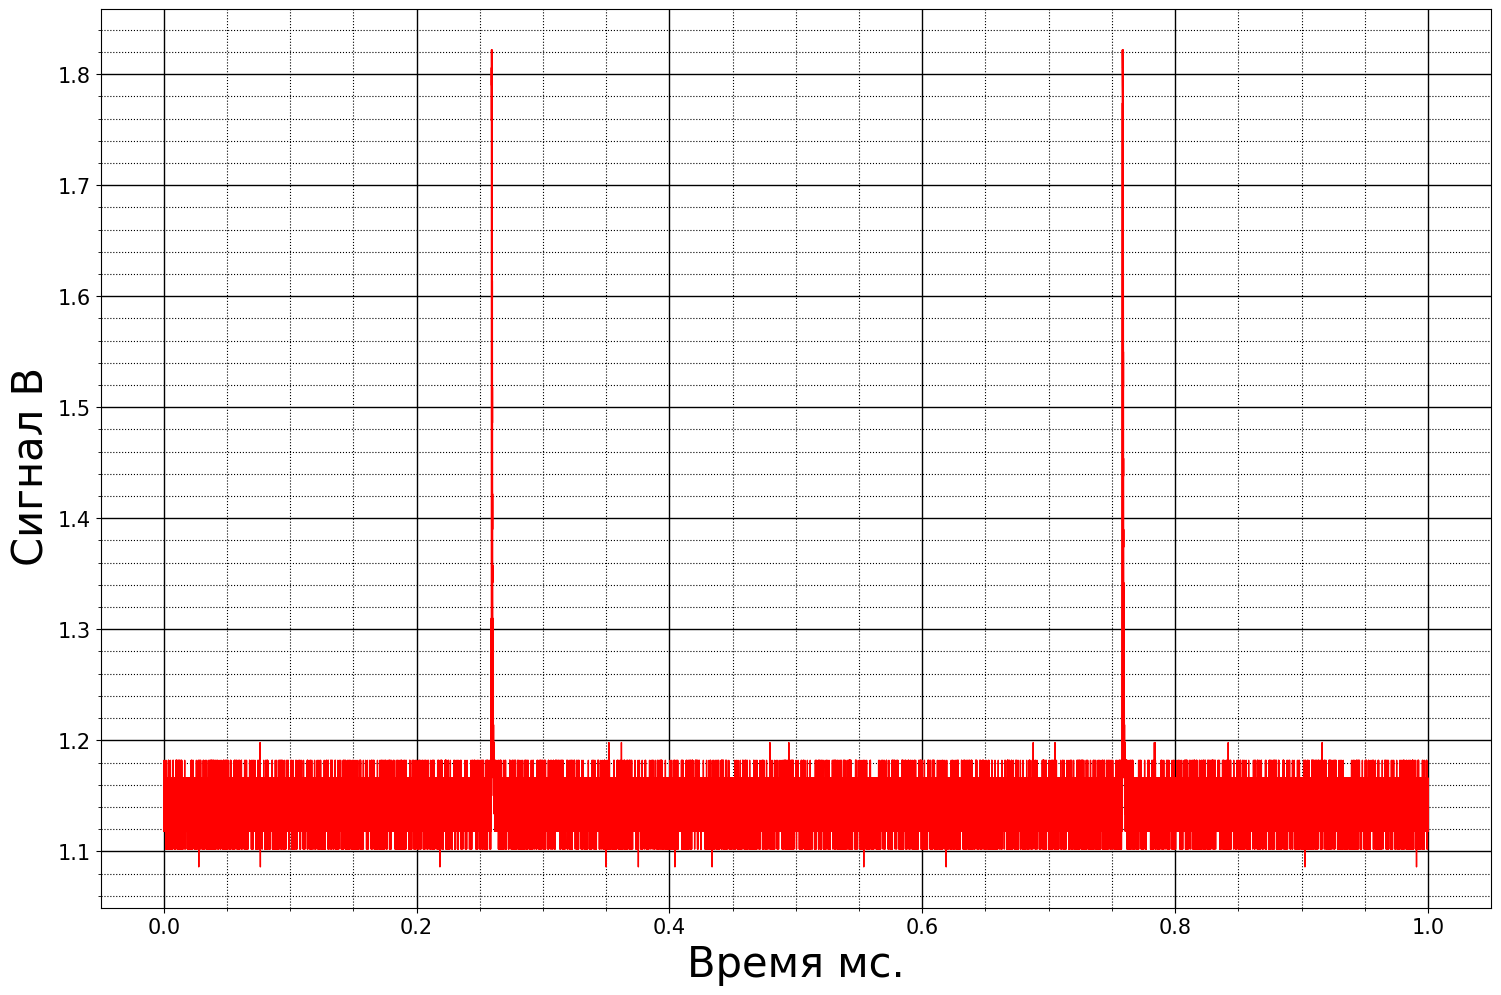

In [15]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 1
ax.plot(sh_interf[:,0],  sh_interf[:,1], c = 'r',linewidth=width)
ax.set_xlabel('Время мс.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Сигнал В ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

In [16]:
#Затем 
# При отсутствии максимумов необходимо ввести параметр prominence и понижать его и dictance
# пока на графике не появятся 2 пика
peaks_idx, prop = find_peaks(sh_interf[:,1], prominence =0.7, distance=10000)

In [17]:
len(peaks_idx)

2

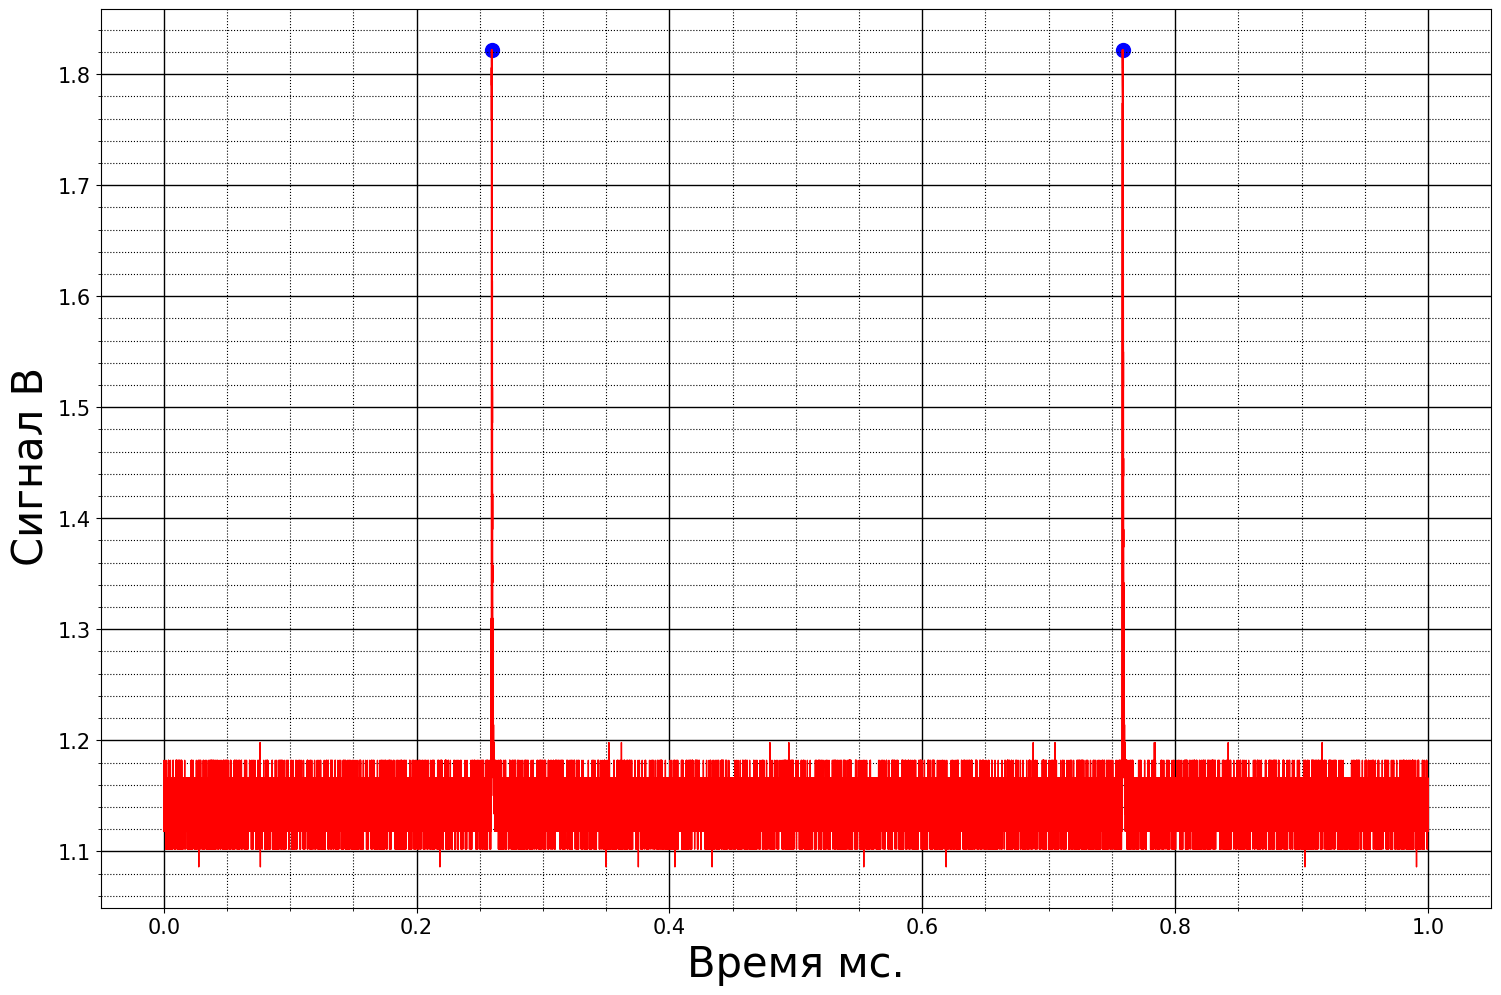

In [18]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 1
ax.plot(sh_interf[:,0],  sh_interf[:,1], c = 'r',linewidth=width)
ax.set_xlabel('Время мс.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Сигнал В ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

ax.scatter(sh_interf[peaks_idx,0],sh_interf[peaks_idx,1], color = 'b', s=100)
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

In [19]:
#Далее построим нормальный график и определим из пропорции коэффициент для преобразования времени в частоты
#параметры для стрелки 
c_ind = int(np.mean(peaks_idx))
dt_ar = (sh_interf[peaks_idx[1],0] - sh_interf[peaks_idx[0],0])/2 
lvl_lines = 1.05*np.max(sh_interf[peaks_idx,1])
lvl_ar = np.mean(np.array([lvl_lines, np.max(sh_interf[peaks_idx,1])]))
l_line_min = np.min(sh_interf[peaks_idx,1])
#длина треугольника стрелки
h_l = 3e-2
#ширина треугольника стрелки
h_w=1e-2
#Ширина основной части стрелки 
ar_w = 5e-3

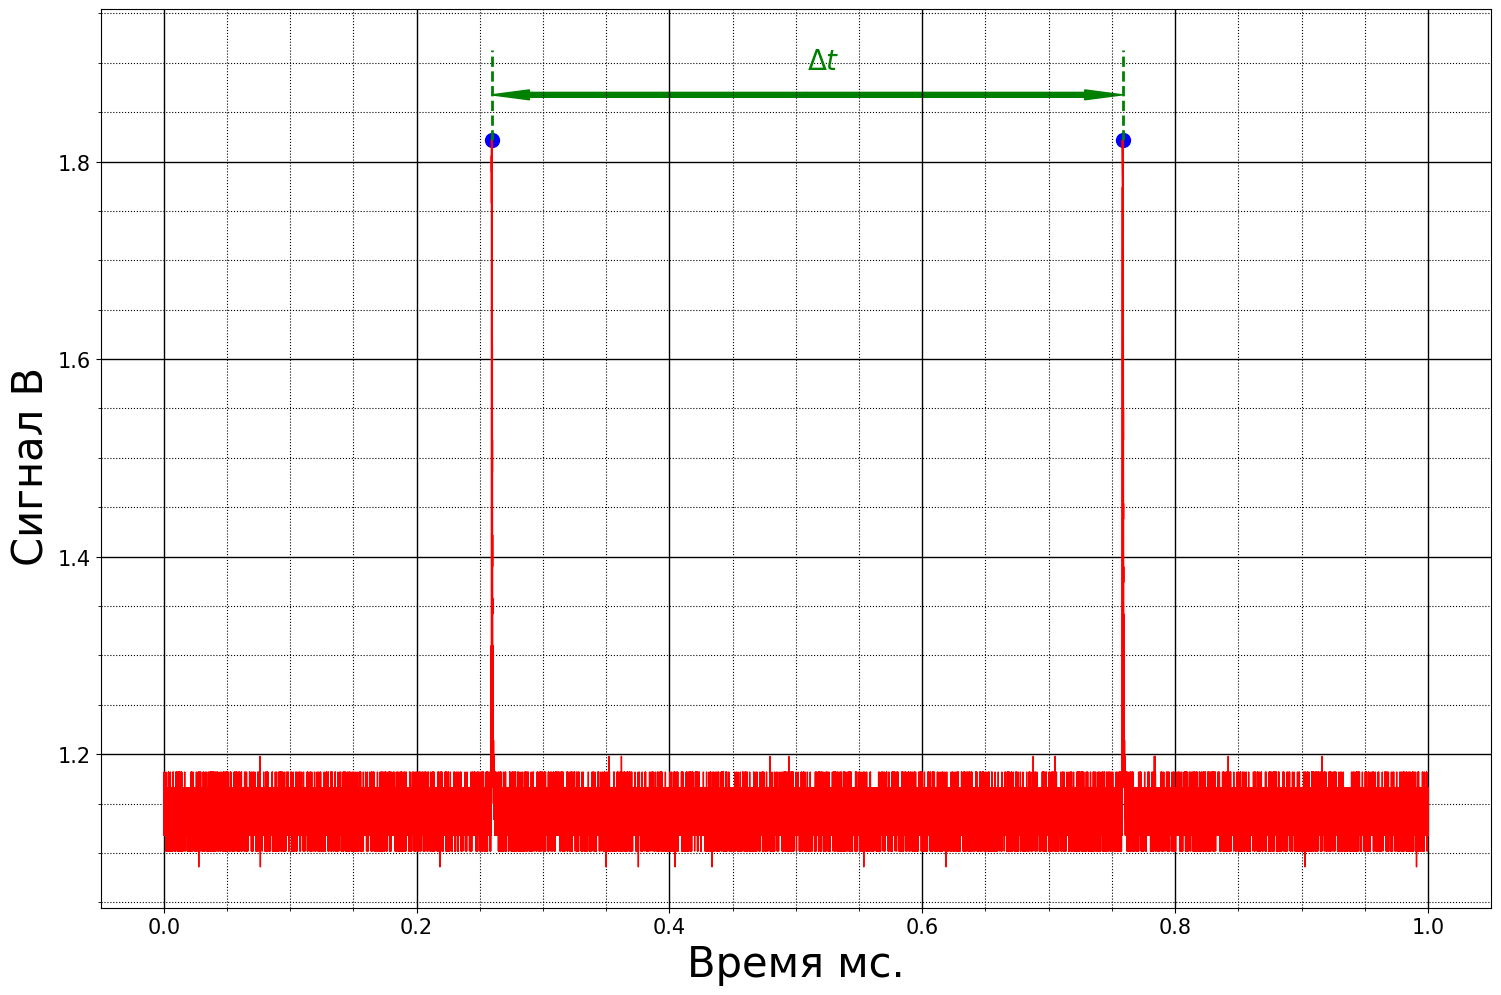

In [20]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 1
ax.plot(sh_interf[:,0],  sh_interf[:,1], c = 'r',linewidth=width)
ax.set_xlabel('Время мс.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Сигнал В ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

ax.scatter(sh_interf[peaks_idx,0],sh_interf[peaks_idx,1], color = 'b', s=100)
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
ax.vlines(sh_interf[peaks_idx,0], ymin=l_line_min, ymax=lvl_lines, color = 'g',linestyle='--', lw = 2)
ax.arrow(sh_interf[c_ind,0], lvl_ar, -dt_ar+h_l, 0, width=ar_w, head_width=h_w, head_length=h_l, color='g')
ax.arrow(sh_interf[c_ind,0], lvl_ar, +dt_ar-h_l, 0,width=ar_w, head_width=h_w, head_length=h_l, color='g')
ax.text(sh_interf[c_ind,0], lvl_lines*0.99, "$Δt$",fontsize = 20, color='g')
fig.savefig(os.path.join(sys.path[0]+'/plots', 'fsr.png'))

$\Delta t$ - время между пиками 

Посчитаем теперь коэффициент для перевода времени в частоту.$\newline$ Из пропорции $\frac{FSR}{\nu} = \frac{\Delta t}{t} \quad \Rightarrow \quad \nu = \frac{FSR}{\Delta t}\cdot t = coeff\cdot t $

In [22]:
delta_t = (sh_interf[peaks_idx[1],0] - sh_interf[peaks_idx[0],0])*1e-3
coeff = FSR / delta_t
print("Коэффициент для преобразования = ",coeff)
print("Время между пиками = ", delta_t)

Коэффициент для преобразования =  500801282051.28204
Время между пиками =  0.0004992


Теперь, зная этот коэффициент необходкимо определить ширину в Гц одного из пиков на графике выше. для этого его нужно поймать. Сделаем это как и раньше.

In [23]:
#n1 и n2 - индексы для поиска максимума, для определенности будем искать первый 
n1 =129000
n2 = 131000
pk_interf = sh_interf[n1:n2] 

#Время будет в мкс
pk_interf[:,0] = (pk_interf[:,0] - np.min(pk_interf[:,0]))*1e+3

#Найдём ширину на полувысоте однако для него вновь придётся найти максимум, так как индексация съехала
#Пик должен быть только один 
peaks_idx, prop = find_peaks(pk_interf[:,1], prominence =0.7, distance=10000)
print("Количество максимумов = ", len(peaks_idx))
print()

Количество максимумов =  1



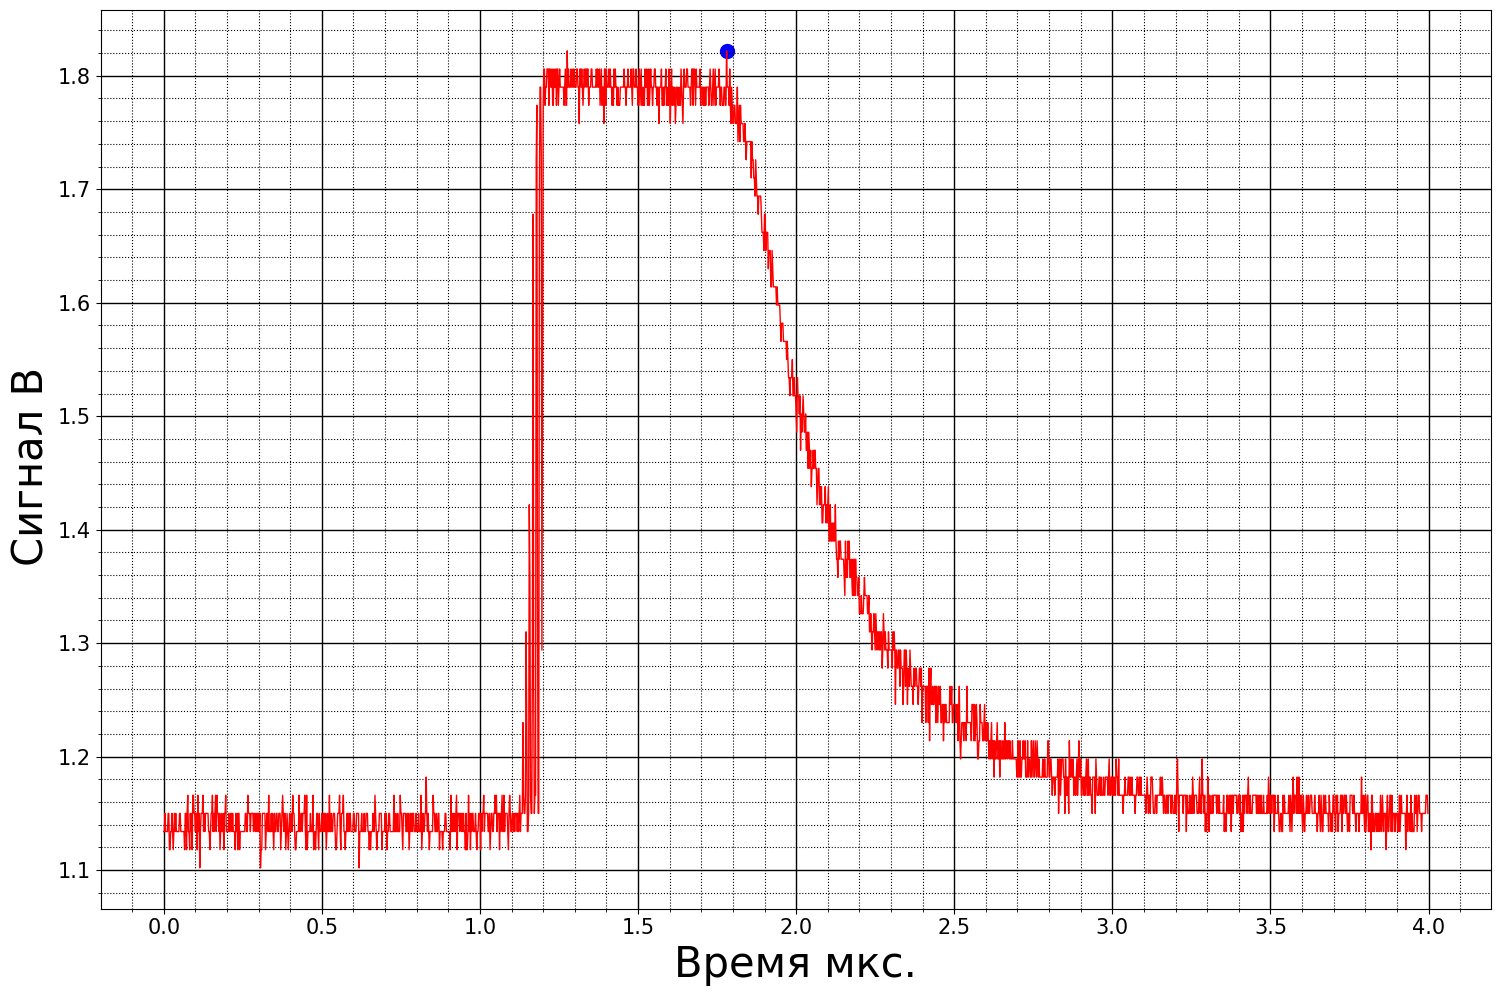

In [24]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 1
ax.plot(pk_interf[:,0],  pk_interf[:,1], c = 'r',linewidth=width)
ax.set_xlabel('Время мкс.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Сигнал В ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()
ax.scatter(pk_interf[peaks_idx,0],pk_interf[peaks_idx,1], color = 'b', s=100)
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

In [25]:
#определим левую и правую границу линии полувысоты 
_, hlvl, lb_hlvl_idx, rb_hlvl_idx = peak_widths(pk_interf[:,1], peaks_idx, rel_height=0.5 )
lb_hlvl_idx = np.round(lb_hlvl_idx).astype('int')[0]
rb_hlvl_idx = np.round(rb_hlvl_idx).astype('int')[0]
lb_hl = pk_interf[lb_hlvl_idx, 0] 
rb_hl = pk_interf[rb_hlvl_idx, 0]

In [27]:
#Далее построим нормальный график и определим из пропорции коэффициент для преобразования времени в частоты
#параметры для стрелки 
c_ind = int(np.mean(np.array([lb_hlvl_idx, rb_hlvl_idx])))
dt_ar = (rb_hl-lb_hl)/2 
# lvl_lines = 1.05*np.max(sh_interf[peaks_idx,1])
lvl_ar = hlvl[0]
# l_line_min = np.min(sh_interf[peaks_idx,1])
#длина треугольника стрелки
h_l = 8e-2
#ширина треугольника стрелки
h_w=1e-2
#Ширина основной части стрелки 
ar_w = 5e-3

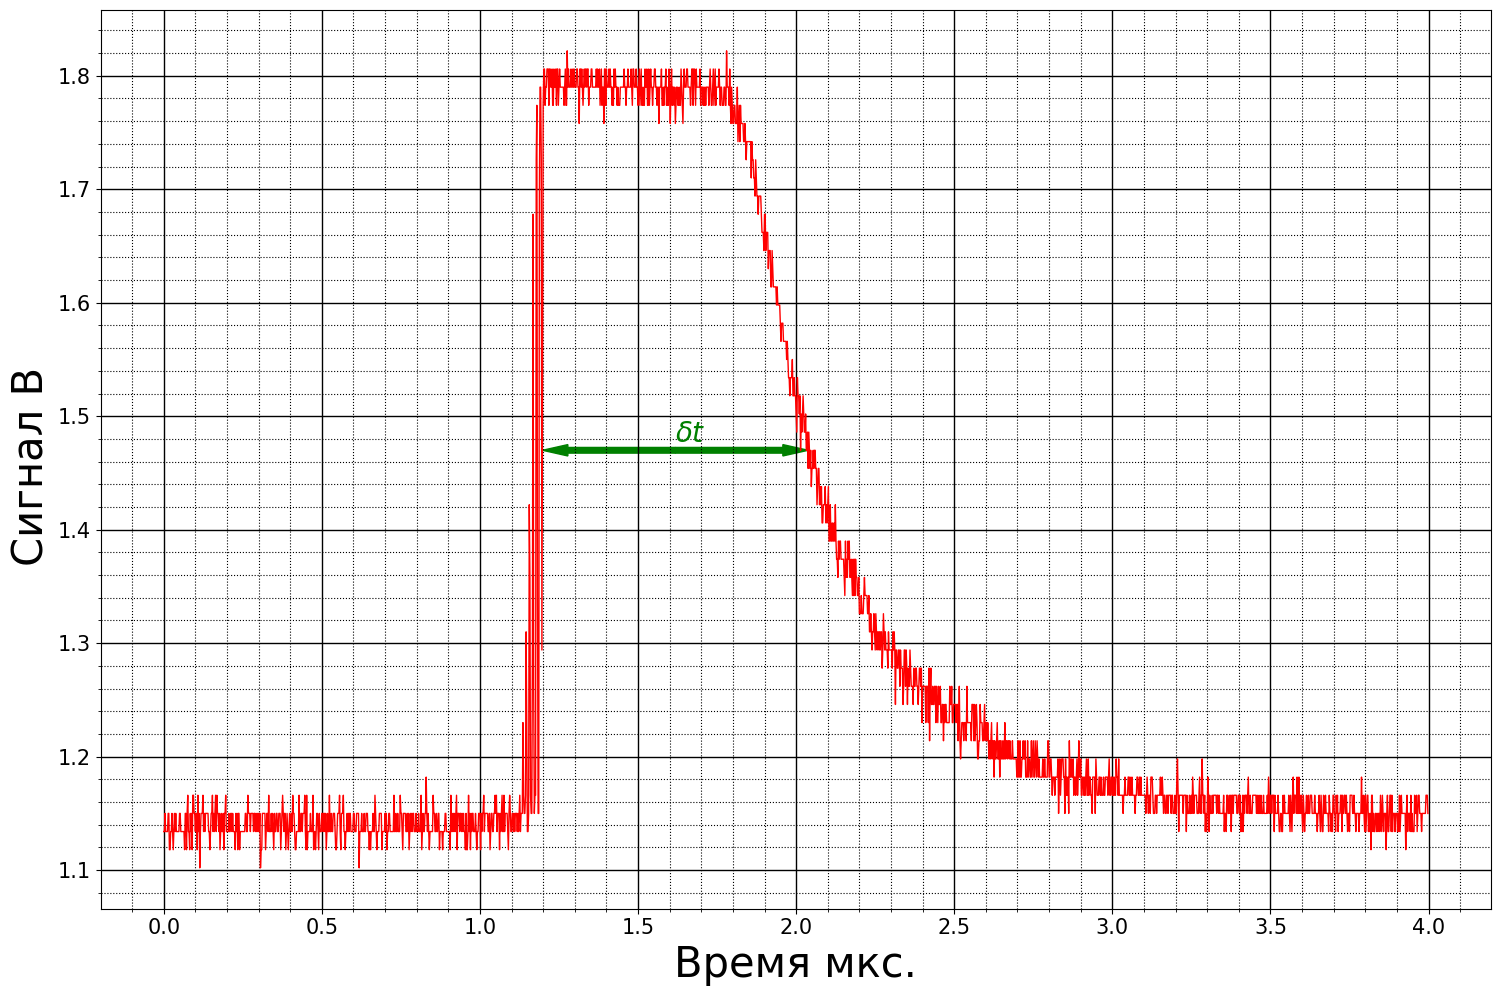

In [28]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 1
ax.plot(pk_interf[:,0],  pk_interf[:,1], c = 'r',linewidth=width)
ax.set_xlabel('Время мкс.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Сигнал В ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
# ax.vlines(sh_interf[peaks_idx,0], ymin=l_line_min, ymax=lvl_lines, color = 'g',linestyle='--', lw = 2)
ax.arrow(pk_interf[c_ind,0], lvl_ar, -dt_ar+h_l, 0, width=ar_w, head_width=h_w, head_length=h_l, color='g')
ax.arrow(pk_interf[c_ind,0], lvl_ar, +dt_ar-h_l, 0,width=ar_w, head_width=h_w, head_length=h_l, color='g')
ax.text(pk_interf[c_ind,0], lvl_ar*1.005, "$δt$",fontsize = 20, color='g')
fig.savefig(os.path.join(sys.path[0]+'/plots', 'width.png'))

$\delta t $ - Ширина пика на полувысоте 

In [29]:
delta_t = dt_ar *2 *1e-6
print("Ширина пика на полувысоте (в секундах) = ", delta_t)

Ширина пика на полувысоте (в секундах) =  8.400000000000074e-07


Представим теперь в частотах 

In [30]:
delta_nu = coeff*delta_t
print("Ширина пика на полувысоте (в Гц) = ", delta_nu)

Ширина пика на полувысоте (в Гц) =  420673.0769230806
